<a href="https://colab.research.google.com/github/zachatalay89/Othello/blob/main/neural_network_stencil_s25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 410/1411 Homework 7: Logistic Regression and Deep Learning

## Assignment Overview

Welcome to Homework 7!

In this assignment, you'll be building multiple binary classifiers. The first two will use logistic regression, and the second, perceptrons. You will be applying these classifiers to classify points in a pickaxe drawing, where the points on the handle are one color, and the axes, another. As such points are not linearly separable, the logistic regression classifier will not succeed. Neither will a simple perceptron. A multilayer perceptron, however, will accomplish this task.

## Learning Objectives

What you will know:
- what it means for data to be linearly separable
- how backpropagation works

What you will be able to do:
- build a binary classifier using logistic regression
- build a binary classifier using perceptrons
- use Python's `PyTorch` library

Let's *take a crack* at the assignment.

## Binary Classification Task

In this assignment, you will train a binary classifier to predict the color (brown or blue) of a point $(x_1, x_2)$ on the Cartesian plane. In fact, your classifier will not predict merely 0 or 1; rather, it will predict a probability $p \in [0, 1]$ that the point is blue.

**Checkpoint**: What would a prediction of $0.9$ signify? And what about $0.05$?

## Logistic Regression

Logistic regression is used for binary classification, i.e., to classify a point as either 0 or 1. In fact, points are assigned probabilities that their classification is 1, much like you might do at an impure leaf of a decision tree.

Assume we are given a data set $\mathcal{D} = \{ (\bm{x}_i, y_i) \}_{i=1}^m$ of $m$ sample points $\bm{x}_i$ with corresponding labels $y_i$.

As linear models are the simplest to build, the main idea of logistic regression is to fit a linear model, with parameters, say, $\bm{w}$ and $b$, not to $\mathcal{D}$ directly as in linear regression, but rather to the odds ratio: i.e., the ratio of the probability of class 1 to the probability of class 0. Given a point $\bm{x}$,
$$ \frac{p (\bm{x})}{1 - p (\bm{x})} = \bm{w}^T \bm{x} + b $$

For mathematical simplicity, a linear model is fit to the natural log of the odds ratio instead:
$$ \ln \left( \frac{p (\bm{x})}{1 - p (\bm{x})} \right) = \bm{w}^T \bm{x} + b $$

Rearranging this formula yields:
$$ p (\bm{x}) = \frac{1}{1 + e^{- \left( \bm{w}^T \bm{x} + b \right) }} $$

Our goal is to infer, or learn, parameter values for $\bm{w}$ and $b$ so that $p (\bm{x})$ accurately reflects the class to which $\bm{x}$ belongs: i.e., $p (\bm{x})$ is close to 1, when $\bm{x}$ is labeled 1; and $p (\bm{x})$ is close to 0, otherwise.

We call the process of using our model to predict a label $\hat{y}$ from $\bm{x}$ **forward propagation** or the **forward pass**.

Let $p_i \doteq p (\bm{x}_i)$ denote the model's prediction on input $\bm{x}_i$ with true label $y_i \in \{ 0, 1 \}$. The model's loss on this input can be described via **cross entropy**:
$$- (y_i \log p_i + (1 - y_i) \log (1 - p_i))$$
When $y_i = 1$, this loss evaluates to $- \log p_i$; and when $y_i = 0$, this loss evaluates to $- \log (1 - p_i)$. In this way, if $y_i = 1$, values of $p_i$ close to 1 yield loss close to 0; on the other hand, if $y_i = 0$, values of $p_i$ close to 0 yield loss close to 0.

<!-- **Cross Entropy:** Given two Bernoulli random variables $A$ and $B$, the expression $- \left( A \log B + (1 - A) \log (1 - B) \right)$ is known as the **cross entropy** between them. -->

**Checkpoint**: The loss contains two terms. What do these terms represent? What happens to the loss when $p_i \approx y_i$? And what happens when they differ dramatically?

The goal in logistic regression is find $\bm{w}$ and $b$ such that the ensuing $\bm{p} = (p_1, \ldots, p_m)$ minimizes the cross entropy of the data:
$$
C_{\mathcal{D}} (\bm{p}) \doteq - \sum_{i = 1}^m (y_i \log p_i + (1 - y_i) \log (1 - p_i))
$$
As this optimization is over the parameters $\bm{w}$ and $b$ that define each $p_i$ as a function of $\bm{x}_i$, we will express it as $C (\bm{w}, b)$, dropping the subscript ${\mathcal{D}}$, as it is clear from context.

As it turns out, this optimization problem does not have a closed-form solution. Instead, we are forced to resort to gradient descent. The partial derivatives of $C$ with respect to each of its parameters is given by:
$$\frac{\partial C (\bm{w}, b)} {\partial w_j} = \frac{1}{m} \sum_{i=1}^m (p(\bm{x}_i) - y_i) x_{ij}$$
and
$$\frac{\partial C (\bm{w}, b)} {\partial b} = \frac{1}{m} \sum_{i=1}^m (p(\bm{x}_i) - y_i)$$

This process of calculating gradients and updating the model's parameters is called **backpropagation** or the **backward pass**.

<!-- ASIDE: MLE Interpretation of Logistic Regression

We model each class label as a draw from a Bernoulli random variable $Y_i$ which takes value $1$ with probability $p_i \doteq p (\bm{x}_i)$, and value 0, otherwise:
$$
\mathcal{P}_{p_{i}} (Y_i) =
\begin{cases}
p_i & \text{if $Y_i = 1$} \\
1 - p_i & \text{if $Y_i = 0$}
\end{cases}
$$

Equivalently, $\mathcal{P}_{p_{i}} (Y_i) = p_i^{Y_i} (1 - p_i)^{1 - {Y_i}}$.

We can reinterpret this family of probability functions as a likelihood function: $\mathcal{L}_{y_i} (p_i) = p_i^{Y_i} (1 - p_i)^{1 - {Y_i}}$, given data point $(\bm{x}_i, y_i)$. Taking logs yields
$$\log \mathcal{L}_{y_i} (p_i) = Y_i \log p_i + (1 - Y_i) \log (1 - p_i)$$

Recall that $p_i$ is defined by the parameters $\bm{w}$ and $b$. The goal in logistic regression, therefore, is to find parameters $\bm{w}$ and $b$ that maximize the (log) likelihood of the data, as defined by this expression.

**Note:** The negative log likelihood $\log \mathcal{L}_{y_i} (p_i)$ is an expression of the cross entropy between Bernoulli random variable $Y_i$, the label, and the Bernoulli random variable that describes the model's predicted labels, i.e., 1 with probability $p_i$. Logistic regression is also often described as minimizing cross entropy "loss", rather than as maximizing likelihood. -->

## Part 0: The Data


In [35]:
# Import required libraries
from google.colab import files
uploaded = files.upload()



import numpy as np
import matplotlib.pyplot as plt
import torch

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from utils import *

Saving dalgona_data.pkl to dalgona_data (2).pkl
Saving utils.py to utils (2).py


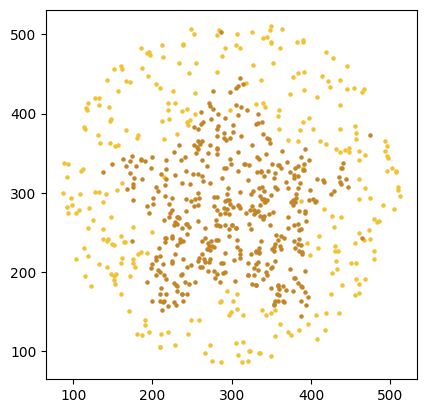

(716, 3)

In [36]:
yellow = '#f1c232'
brown = '#c48527'

data_points = load_data("dalgona_data.pkl", yellow, brown)
data_points.shape

Observe that this dataset is *not* linearly separable. There is no line we can draw through this image that separates the brown and blue points.

Let us rearrange our data so that we can train a model.

In [37]:
X, y = create_dataset(data_points)
print("Features shape:", X.shape, "Labels shape:", y.shape)

Features shape: (716, 2) Labels shape: (716, 1)


## Part 1: Logistic Regression with NumPy and Gradient Descent


In this section, you'll implement logistic regression (from scratch) using `NumPy`.

To do so, you will code the following functions:
1. `initialize_parameters`: Initialize the weights and bias terms to 0
1. `sigmoid`: Implement the sigmoid activation function using numpy
1. `backward`: Computes the gradients of the loss with respect to the model's parameters
1. `forward`: Run the model's forward pass, i.e., compute the model's predicted probabilities
1. `predict`: Converts the model's predicted probabilities into binary labels (1 iff the prediction exceeds 0.5)
1. `accuracy`: Returns the model's accuracy (i.e., its average number of mistakes)
1. `optimize`: Use gradient descent to minimize cross entropy loss

### Task: Helper Functions

You should start by implementing the requisite helper functions (all but `optimize`).

In [38]:
def initialize_parameters(d: int):
    """
    Initialize w vector and bias term based on the number of features
    Hint: you can use np.zeros to initialize a vector of all 0s with a given shape.
    In practice, you may want to use random initial parameters, but all 0s works fine here.

    You should confirm the shapes of your parameters are correct before doing anything else!
    If these are wrong, everything down the line will be wrong as well.

    Inputs:
        - d: number of features in dataset
    Outputs:
        - w: weights vector of shape (d, 1)
        - b: bias term (float)
    """
    w = np.zeros((d, 1))
    b = 0

    return w, b

def sigmoid(z: np.ndarray):
    """
    Implement the sigmoid function.

    sigmoid(z) = 1 / (1 + e^(-z))

    Must work where z is a single input (i.e., a float) or a vector (i.e., an array of shape (m))

    Inputs:
        - z: input value
    Outputs:
        - output of sigmoid(z)
    """
    return 1/ (1 + np.exp(-z))

def backward(p_pred, X, y):
    """
    Given the model's inputs (X), outputs (p_pred), and true labels (y), compute the gradients of the loss with respect to w and b
    Return a tuple of (dw, db), where dw is the gradient wrt w and db is the gradient wrt b.
    dw should be a column vector of shape (d, 1) and db should be a scalar.

    Inputs:
        - p_pred: predicted probabilities of shape (m, 1)
        - X: input data of shape (m, d)
        - y: true labels of shape (m, 1)
    Outputs:
        - dw: gradient of the loss with respect to w, of shape (d, 1)
        - db: gradient of the loss with respect to b, a scalar
    """
    m = X.shape[0]  # number of examples

    # Compute the gradients
    dw = (1/m) * np.dot(X.T, (p_pred - y))  # gradient with respect to w
    db = (1/m) * np.sum(p_pred - y)  # gradient with respect to b

    return dw, db

def forward(w, b, X):
    """
    Run a forward pass of logistic regression given model parameters (w, b) and data X
    Compute the output of the logistic regression from input matrix X and parameters w and b

    Inputs:
        - w: weights term of shape (d, 1)
        - b: bias term (float)
        - X: input data of shape (m, d)
    Output:
        - predicted probabilities of shape (m, 1)
    """
    z = np.dot(X, w) + b  # linear combination of inputs and weights
    p_pred = sigmoid(z)  # apply the sigmoid function

    return p_pred

def predict(w, b, X):
    """
    Run logistic regression model forward to compute predictions

    Turn predictions into labels
    Everything with probability > 0.5 is classified as a 1, everything else as a 0.
    Should call forward() and convert the outputs to labels.

    This method is used for computing accuracy and plotting decision boundaries.

    - Inputs:
        - w: weights term of shape (d, 1)
        - b: bias term (float)
        - X: input data of shape (n, d)
    Output:
        - predicted labels of shape (m, 1)
    """
    p_pred = forward(w, b, X)  # get predicted probabilities
    predicted_labels = (p_pred > 0.5).astype(int)  # convert probabilities to binary labels

    return predicted_labels

def accuracy(predicted_labels, y):
    """
    Compute accuracy between predicted_labels and y

    Inputs:
        predicted_labels: predicted labels of shape (m, 1)
        y: true labels of shape (m, 1)
    Outputs:
        - accuracy: accuracy of the model (float)
    """
    correct_predictions = np.sum(predicted_labels == y)
    accuracy = correct_predictions / y.shape[0]

    return accuracy

### Task: Gradient Descent

Next, you'll move on to implementing gradient descent.

Fill in the `optimize` function so that it first runs the model forward to make predictions, and then backwards to compute the gradients of the loss with respect to the model's parameters. Finally, it updates the parameter values based on their gradients.

You should expect your model to exhibit approximately 70% accuracy.

In [39]:
# Optimization using gradient descent
def optimize(w, b, X, y, num_iterations, learning_rate):
    """
    For a given set of model parameters (w, b) and dataset (X, y), run gradient descent for num_iterations
    Fill in the lines for the forward step (get model outputs), backward step (get gradient dL/dw, dL/db)
    and then update parameters w and b accordingly

    Inputs:
        w: weights term of shape (d, 1)
        b: bias (float)
        X: input data of shape (m, d)
        y: labels of shape (d, 1)
        num_iterations: number of iterations to run gradient descent for
        learning_rate: The learning rate for parameter updates

    Outputs:
        params: Model parameters for the final model {"w": np.ndarray, "b": float}
        params_list: List of previous parameter settings (for animation)
    """
    params_list = []
    for i in range(num_iterations):
        # TODO: Fill in
        # Forward propagation
        p_pred = forward(w, b, X)

        # Backward propagation
        dw, db = backward(p_pred, X, y)

        # Update parameters w, b
        w = w - learning_rate * dw
        b = b - learning_rate * db
        # End TODO

        # We'll track the parameters throughout the training process for some visualizations.
        params_list.append((w, b))

    params = {"w": w, "b": b}

    return params, params_list

# Extract n_features from X (it's 2 features for x, y of pixels)
n_features = X.shape[1]
w, b = initialize_parameters(n_features)
params_np, params_list = optimize(w, b, X, y, num_iterations=400000, learning_rate=0.001)

# Predictions and accuracy
predictions_np = predict(params_np["w"], params_np["b"], X)
accuracy_np = np.mean(predictions_np == y)
print("Final Model:")
print(f"NumPy model accuracy: {accuracy_np:.2f}")

Final Model:
NumPy model accuracy: 0.70


### Task: Decision Boundaries

The **decision boundary** of a binary classifier depicts where the decisions change from 0's to 1's. We provide support code so that you can plot the decision boundaries of the binary classifier's you build in this assignment.

Our code to generate a decision boundary first samples a large number of inputs, and then applies the model to predict the corresponding outputs. Note that these predictions are made using the `predict` function, not the `forward` function. In particular, they are labels not probabilities.

Run the support code below to visualize your logistic regression model's predictions and plot its decision boundary.

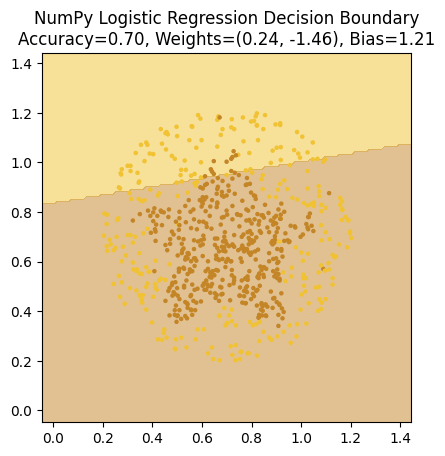

In [40]:
plot = plot_decision_boundary(params_np["w"], params_np["b"], X, y, predict, accuracy, yellow, brown)

### Task: Gradient Descent Animation

Run the support code below to create an animation of your model's decision boundary--in particular, to see how it changes over the course of running the gradient descent algorithm. If the animation generation takes too long, you can skip to the next task.

KeyboardInterrupt: 

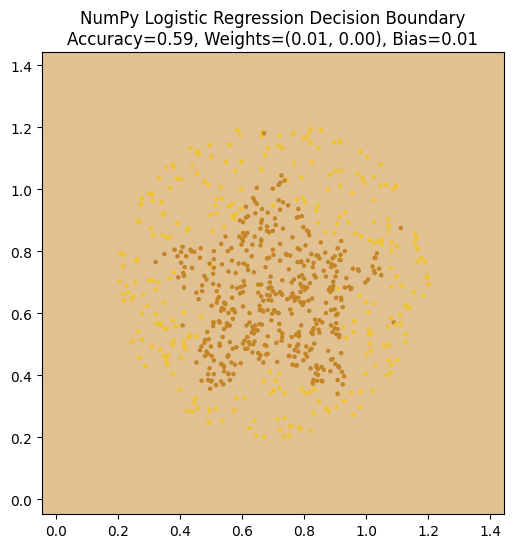

In [41]:
create_gradient_descent_animation(X, y, params_list[:170], predict, accuracy, yellow, brown, fps=33)

## Part 2: Logistic Regression with PyTorch

The goal of the next part of the assignment is for you to start to become familiar with the PyTorch library, a popular library for building neural networks. To that end, we've provided you with another implementation of logistic regression, this time using PyTorch. Read through our code carefully, comparing this implementation to your implementation of logistic regression using gradient descent.

One similarity you will observe is that `torch` and `numpy` provide a similar set of built-in functions, like `sum`, `mean`, and `log`. But there are also some superficial differences. For instance, torch uses `torch.mm` for matrix multiplication, while `numpy` uses `dot` or `matmul` (although you can use @ for matrix multplication with either library). Additionally, `torch`'s default data type is called a `tensor`, rather than `numpy`'s `ndarray`. A tensor, is a mathematical object that generalizes matrices; it can have additional dimensions, beyond than just rows and columns.

The key difference between libraries, however, lies in how gradients are computed. In our implementation of logistic regression from scratch, we computed the gradients of the loss function by hand, and coded those formulas directly.

In `torch`, in contrast, gradients are computed automatically. We define a loss function, and then call `backward` on this function. After `backward` is called, all `torch` tensors that were used to compute the loss (for which `requires_grad=True`) are automatically endowed with an associated `.grad` attribute, which represents the gradient of the loss (or whatever function `backward` was called on) with respect to that tensor.

Run our code, and observe that the accuracy and the decision boundary are more or less exactly as they were in your implementation of logistic regression from scratch.

PyTorch model accuracy: 0.69


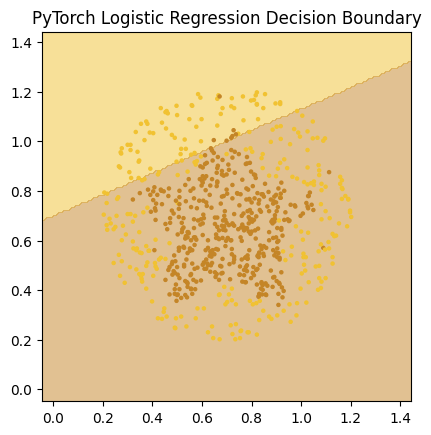

In [43]:
# Initialize parameters
def initialize_parameters_torch(n_features):
    """
    Initialize w, b to torch tensors. w is a (d, 1) column vector,
    b is a scalar, but needs to be registered as a tensor for gradients to track.

    w and b are specified to require grad to ensure their gradient is computed when backward is called

    Inputs:
        n_features: number of features
    Outputs:
        w: Torch Tensor of shape (d, 1) weights
        b: Torch Tensor of shape (1) bias term
    """
    w = torch.zeros((n_features, 1), dtype=torch.float32, requires_grad=True)
    b = torch.zeros(1, dtype=torch.float32, requires_grad=True)
    return w, b

# Sigmoid function
def sigmoid_torch(z):
    """
    Torch has a built in sigmoid function. That's pretty convenient, as it's commonly used in Neural Networks

    Inputs:
        z: torch.tensor of shape (m)
    Outputs:
        a: torch.tensor of shape (m)
    """
    return torch.sigmoid(z)

# Forward propagation
def forward_torch(w, b, X):
    z = torch.mm(X, w) + b
    p_pred = sigmoid_torch(z)
    return p_pred

# Define cross entropy loss
def loss_torch(p_pred, y):
    """
    Log-loss/Binary Cross Entropy loss function
    """
    loss = -torch.mean(y * torch.log(p_pred) + (1 - y) * torch.log(1 - p_pred), dim=0)
    return loss

# Optimization using PyTorch's automatic gradient calculation
def optimize_pytorch(w, b, X, y, num_iterations, learning_rate, track_gradients=False):
    # Convert inputs to PyTorch tensors
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    for i in range(num_iterations):
        # Forward propagation within a torch gradient tracker
        p_pred = forward_torch(w, b, X)

        # Compute loss
        loss = loss_torch(p_pred, y)

        # Call backward on loss to run the backpropagation step
        loss.backward()

        # Extract gradients
        dw = w.grad
        db = b.grad

        # Update Parameters
        # Note, we are doing manual updates, so we don't want these gradients tracked farther (because we are manually tracking them for demonstration purposes)xw
        with torch.no_grad():
            w -= learning_rate * dw
            b -= learning_rate * db

    # Detach is special to torch. w contains more than just the values in the vector
    # w is also part of a (potentially large) computation graph,
    # detaching variables when you don't need the computation graph anymore saves
    # significant amounts of RAM.
    model_params = {"w": w.detach().numpy(), "b": b.detach().numpy()}

    return model_params, params_list

def predict_torch(w, b, X):
    """
    Prediction method for torch. Run the forward method and turn p_pred into 0 or 1 labels.

    Inputs:
        w: Torch tensor of weights of model
    Outputs:
        predictions: Predicted labels of X, either 0 or 1
    """
    X = torch.tensor(X, dtype=torch.float32)
    p_pred = forward_torch(w, b, X)
    predictions = (p_pred > 0.5).float()
    return predictions

# Example training with PyTorch
n_features = X.shape[1]
w, b = initialize_parameters_torch(n_features)
params_torch, params_list = optimize_pytorch(w, b, X, y, num_iterations=500, learning_rate=0.001, track_gradients=True)

# Predictions and accuracy
predictions_torch = predict_torch(w, b, X)
accuracy_torch = torch.mean((predictions_torch == torch.tensor(y)).float())
print(f"PyTorch model accuracy: {accuracy_torch:.2f}")

plot_decision_boundary_torch(params_torch["w"], params_torch["b"], X, y, sigmoid_torch, yellow, brown)

## Part 3: Build and Train a Simple Perceptron with PyTorch

In this part of the assignment, we will introduce you to torch's neural network module (called `nn`). This time, we use torch to build a simple perceptron (i.e., a neural network with no hidden layers) with a sigmoid activation unit, so that this neural network encodes logistic regression. Once again, this code should function more or less as our implementation of logistic regression in torch, and as your implementation of logistic regression from scratch.

You should use the following functions provided by `nn`:
- `nn.Linear`, which creates a linear layer
- `nn.Sigmoid`, which creates a sigmoid activation unit

`nn.Linear` is the most common feed-forward layer for neural networks (because it is simplest). It takes as input two parameters, the input dimension and the output dimension for the layer.

You should define these functions in `__init__`, and use them for the forward pass of the model.

You can find the torch documentation [here](https://pytorch.org/docs/stable/index.html).

In [44]:
import torch.nn as nn

class SimplePerceptron(nn.Module):
    """
    A simple single neuron (perceptron) torch model.
    """
    def __init__(self, input_dim, output_dim):
        super(SimplePerceptron, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()


    def forward(self, X):
        """
        The forward method (i.e., go from inputs to outputs)
        """
        linear_output = self.fc(X)
        # Apply the sigmoid activation function
        out = self.sigmoid(linear_output)
        return out

Hang on. There's a `forward` method for our model, but what happened to the `backward` method?

Since `SimplePerceptron` inherits from `nn.Module`, it is provided with a `backward` method that automatically computes the gradients of the model's parameters! That's the beauty of working with PyTorch!

There's one other important note about `nn.Module`: `nn.Module` overloads the parentheses operator (`__call__`) to run the forward method. To run the forward pass on a model, you can either call `model.forward(X)` or `model(X)`. The two are equivalent.

Use the following blocks of code to check the performance of your PyTorch perceptron.

In [45]:
# Compute loss
def loss_mlp(p_pred, y):
    """
    Compute Log Loss (BCE)
    """
    m = y.shape[0]
    loss = -(1 / m) * torch.sum(y * torch.log(p_pred) + (1 - y) * torch.log(1 - p_pred))
    return loss

# Train the MLP
def train_mlp(model, X, y, num_iterations, learning_rate):
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    for i in range(num_iterations):
        # Forward propagation
        p_pred = model.forward(X)

        # Compute loss
        loss = loss_mlp(p_pred, y)

        # Backward propagation
        loss.backward()

        # Update parameters manually
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad

        # Zero the gradients
        # (if you don't clear the gradients, the parameters will continue to accumulate information)
        model.zero_grad()

    return model

# Predict function for MLP
def predict_mlp(model, X):
    X = torch.tensor(X, dtype=torch.float32)
    with torch.no_grad():
        output = model.forward(X)
        predictions = (output > 0.5).float()
    return predictions

def accuracy_torch(model, X, y):
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y)
    with torch.no_grad():
        p_pred = model.forward(X)
        predictions = (p_pred > 0.5).float()
        return torch.mean((predictions == y).float())

In [46]:
def train_mlp(model, X, y, num_iterations, learning_rate):
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    for i in range(num_iterations+1):
        # Forward propagation
        p_pred = model.forward(X)

        # Compute loss
        loss = loss_mlp(p_pred, y)
        # Backward propagation
        loss.backward()

        # Update parameters manually
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad

        # Zero the gradients
        # (if you don't clear the gradients, the parameters will continue to accumulate information)
        model.zero_grad()

        # Record the loss
    return model

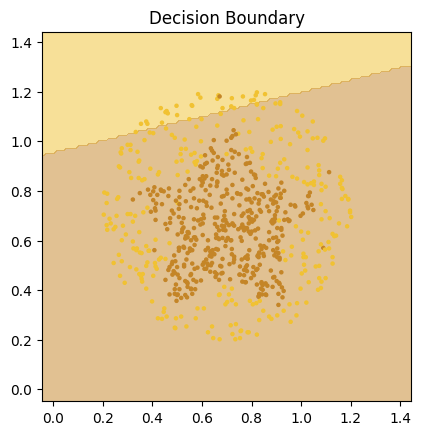

Final Model Accuracy:  0.6340782046318054


In [47]:
n_features = X.shape[1]
model = SimplePerceptron(input_dim=n_features, output_dim=1)
model = train_mlp(model, X, y, 1000, 0.1)

plot_decision_boundary_mlp(model, torch.tensor(X), torch.tensor(y), yellow, brown)
model_accuracy = predict_mlp(model, X)
print("Final Model Accuracy: ", accuracy_torch(model, X, y).item())

## Part 4: Build and Train a Multilayer Perceptron with PyTorch

Now it's your turn to come up with your own neural network model! By this we mean, choosing the number of layers and their sizes. The key thing to know when constructing your network, is that the output size of a layer must match the input size of the next layer. If they do not match, you'll get a shape error.

We recommend that you stick with linear layers. After every linear layer, you should add an activation function.

**Conceptual checkpoint:** Why is it important to include non-linear activation functions?

Activation Functions:
1. `nn.ReLU`: Rectified Linear Unit. ReLU $(x) = x$, if $x\geq 0$; otherwise, ReLU $(x) = 0$.
1. `nn.Tanh`: Hyperbolic Tan Function.
1. `nn.Sigmoid`: Can be used as an activation function in hidden layers, as well as for the output neuron.

**Hint** In our experience, Tanh and Sigmoids work best for this classification problem.

You may also want to experiment with the learning rate of your model, and the number of iterations of gradient descent.


### Task: MyMLP

Find a set of parameters for your implementation of `MyMLP` that separates the data much better than logistic regression. For full credit, you should achieve greater than 90% accuracy. We have provided a working (but perhaps overly complicated) model for your reference called `StaffMLP`. Obviously, your solution should be different from `StaffMLP`.

Your model should satisfy the following requirements:
1. It should consist of multiple hidden layers (layers that are not the input or output of the network).
1. These hidden layers should not all be the same size; their input and output dimensions should differ in some way.

After you complete this task, you should answer the following questions in your README:
1. What hyperparameters did you experiment with (i.e., number and size of layers, activation functions, learning rates, etc.)
1. What effect on performance did these hyperparameters have? How did you arrive at your final model; was it random search or did you use some other reasoning to guide your experimentation?
1. What effect would you expect doubling the size of each layer (other than the input and output layers) to have? Try your model with more parameters, does it perform better/worse/the same?

Final MLP model accuracy: 0.95%


<ipython-input-45-62c1334e1eed>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


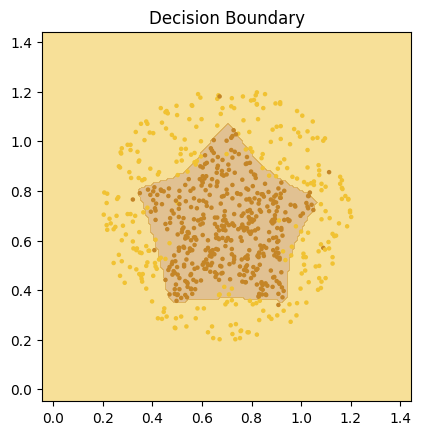

In [52]:
# Another working setting, do not distribute
class MyMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        Inputs:
            input_dim: Number of features. Must match input dimension of first linear layer
            output_dim: Number of outputs (1 in this case). Must match the output dimension of your final linear layer
        """
        super(MyMLP, self).__init__()
        # TODO: Add model layers and activation functions
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, output_dim)

        # Define activation functions
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, X):
        """
        The forward pass of your neural network.
        Take in input X and run each layer of the network.
        Your forward pass should use each of the layers in your network
        """
        # TODO: Add forward pass
        out = self.tanh(self.fc1(X))
        # Second hidden layer with ReLU activation
        out = self.relu(self.fc2(out))
        # Third hidden layer with ReLU activation
        out = self.tanh(self.fc3(out))
        # Output layer with sigmoid activation
        out = self.sigmoid(self.fc4(out))
        return out

def train_my_model():
    input_dim = X.shape[1]
    output_dim = 1 # The output dimension should be 1
    model = MyMLP(input_dim, output_dim)
    model = train_mlp(model, X, y, 50000, learning_rate=0.01)
    return model

def model_accuracy(model):
    # Final predictions and accuracy
    X_tensor = torch.tensor(X, dtype=torch.float32)
    predictions_mlp = predict_mlp(model, X_tensor)
    accuracy_mlp = torch.mean((predictions_mlp == torch.tensor(y)).float())
    print(f"Final MLP model accuracy: {accuracy_mlp:.2f}%")
    plot_decision_boundary_mlp(model, torch.tensor(X), torch.tensor(y), yellow, brown)
    return predictions_mlp, accuracy_mlp

predictions_mlp, accuracy_mlp = model_accuracy(train_my_model())

## Part 5: Our model parameters

<ipython-input-45-62c1334e1eed>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


Final MLP model accuracy: 0.96%


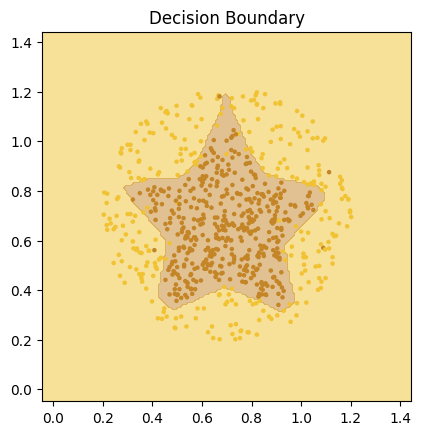

In [49]:
# Define the MLP class
class StaffMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(StaffMLP, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, X):
        # Forward pass
        z1 = self.fc1(X)
        a1 = torch.relu(z1)
        z2 = self.fc2(a1)
        a2 = self.tanh(z2)
        z3 = self.fc3(a2)
        a3 = torch.relu(z3)
        z4 = self.fc4(a3)
        a4 = self.tanh(z4)
        z5 = self.fc5(a4)
        output = self.sigmoid(z5)
        return output

# Example training with the MLP
input_dim = X.shape[1]
hidden_dim = 32  # You can change the number of hidden units
output_dim = 1 # The output dimension should be 1
model = StaffMLP(input_dim, hidden_dim, output_dim)
model = train_mlp(model, X, y, 50000, learning_rate=0.01)

# Final predictions and accuracy
X_tensor = torch.tensor(X, dtype=torch.float32)
predictions_mlp = predict_mlp(model, X_tensor)
accuracy_mlp = torch.mean((predictions_mlp == torch.tensor(y)).float())
print(f"Final MLP model accuracy: {accuracy_mlp:.2f}%")
plot_decision_boundary_mlp(model, torch.tensor(X), torch.tensor(y), yellow, brown)